In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# read external data
df_test = pd.read_csv('~/Downloads/ds-NeueFischer-Bootcamp/phase3_machine_learning_basics/Air_Polution_Analysis/data/Test.csv')
df_train = pd.read_csv('~/Downloads/ds-NeueFischer-Bootcamp/phase3_machine_learning_basics/Air_Polution_Analysis/data/Train.csv')
#df_train.info()
#df_train.head()
#df_train.describe()
#print(df_train.dtypes)
#non_null_counts = df_train.notnull().sum()
#print(non_null_counts)
#missing_values = df_train.isnull()
#print(missing_values)
#df_train.columns
df_train.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [4]:
#print(missing_percentage.sort_values(ascending=False))
#Remove Features with Too Many Missing Values, If a feature has more than a certain threshold of missing values (e.g., >50%), it might be irrelevant for our model
threshold = 0.5
missing_percentage_train = df_train.isnull().mean() * 100  # Calculate % of missing values for each column
Filtered_df_train = df_train.loc[:, missing_percentage_train < (threshold * 100)]
Filtered_df_train.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.000,23.000,53.000,769.500,92,11.000,60.200,...,22.358,-0.000,0.313,-0.000,-1.861,0.000,76.536,38.593,-61.753,22.364
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.000,25.000,63.000,1319.850,91,14.600,48.800,...,28.615,0.000,0.434,0.000,-1.453,0.059,-14.708,59.625,-67.694,28.615
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.000,8.000,56.000,1181.960,96,16.400,33.400,...,34.297,0.000,0.357,0.000,-1.573,0.082,-105.201,49.840,-78.343,34.297
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.000,10.000,55.000,1113.670,96,6.912,21.300,...,30.545,0.000,0.585,0.000,-1.239,0.121,-104.334,29.181,-73.897,30.545
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.000,9.000,52.000,1164.820,95,13.900,44.700,...,26.900,0.000,0.408,0.000,0.202,0.038,58.850,0.797,-68.612,26.900


In [5]:
Filtered_df_train.drop(['Place_ID X Date', 'Date', 'Place_ID'], axis=1, inplace=True)

In [6]:
Filtered_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 72 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   target                                               30557 non-null  float64
 1   target_min                                           30557 non-null  float64
 2   target_max                                           30557 non-null  float64
 3   target_variance                                      30557 non-null  float64
 4   target_count                                         30557 non-null  int64  
 5   precipitable_water_entire_atmosphere                 30557 non-null  float64
 6   relative_humidity_2m_above_ground                    30557 non-null  float64
 7   specific_humidity_2m_above_ground                    30557 non-null  float64
 8   temperature_2m_above_ground                          30557 non-nul

In [7]:
threshold = 0.5
missing_percentage_test = df_test.isnull().mean() * 100  # Calculate % of missing values for each column
Filtered_df_test = df_test.loc[:, missing_percentage_test < (threshold * 100)]
Filtered_df_test.info()
# Check data types of each column
#print(df_test.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16136 entries, 0 to 16135
Data columns (total 70 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      16136 non-null  object 
 1   Date                                                 16136 non-null  object 
 2   Place_ID                                             16136 non-null  object 
 3   precipitable_water_entire_atmosphere                 16136 non-null  float64
 4   relative_humidity_2m_above_ground                    16136 non-null  float64
 5   specific_humidity_2m_above_ground                    16136 non-null  float64
 6   temperature_2m_above_ground                          16136 non-null  float64
 7   u_component_of_wind_10m_above_ground                 16136 non-null  float64
 8   v_component_of_wind_10m_above_ground                 16136 non-nul

In [8]:
Filtered_df_test.drop(['Place_ID X Date', 'Date', 'Place_ID'], axis=1, inplace=True)

In [9]:
#split df_train into features (X_train) and target (y_train), and then split df_train further into train and validation sets using train_test_split. 
# Then, you can use df_test only for predictions after the model is trained.

from sklearn.model_selection import train_test_split

# Splitting the training data (df_train)
X_train = Filtered_df_train.drop('target', axis=1)  # Features of the training set
y_train = Filtered_df_train['target']  # Target variable for the training set

# Split the df_train into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# df_test will only be used for prediction, as it does not contain a target variable
X_test = Filtered_df_test  # Test features for making predictions

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
model = RandomForestRegressor(max_depth=3,random_state=42)

In [11]:
# Fit the model on the training data (train the modeL)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [12]:
#Evaluate the Model Using Validation Data:
y_val_pred = model.predict(X_val)

In [13]:
#Evaluate the performance of the model using appropriate regression metrics (e.g., Mean Squared Error (MSE) or R-squared):
from sklearn.metrics import mean_squared_error, r2_score

mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"Validation Mean Squared Error (MSE): {mse_val}")
print(f"Validation R-squared (R²): {r2_val}")

Validation Mean Squared Error (MSE): 501.00084261626137
Validation R-squared (R²): 0.7722830313520903


In [ ]:
#Model Prediction on Test Data: cannot compute test data because there are target missing columns.
#y_test_pred = model.predict(X_test)
#print(y_test_pred)

stoped here

In [ ]:
# Fill missing values with mean
#Filtered_df_train.fillna(Filtered_df_train.mean(), inplace=True)  # For numeric columns
#print(Filtered_df_train.isnull().sum()) #Ensure that 0 is printed for all numeric columns

# Fill missing values with mean
#Filtered_df_test.fillna(Filtered_df_test.mean(), inplace=True)  # For numeric columns
#print(Filtered_df_test.isnull().sum()) #Ensure that 0 is printed for all numeric columns

target                                  0
precipitable_water_entire_atmosphere    0
relative_humidity_2m_above_ground       0
specific_humidity_2m_above_ground       0
temperature_2m_above_ground             0
                                       ..
L3_SO2_cloud_fraction                   0
L3_SO2_sensor_azimuth_angle             0
L3_SO2_sensor_zenith_angle              0
L3_SO2_solar_azimuth_angle              0
L3_SO2_solar_zenith_angle               0
Length: 68, dtype: int64


In [ ]:
#Scale/normalize the data => no need to scale for random forest
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#Filtered_df_train_scaled = pd.DataFrame(scaler.fit_transform(Filtered_df_train), columns=Filtered_df_train.columns)

Key Notes:

    Training Data (df_train): The target column exists here, so we separate the features and the target, then split the data into training and validation sets using train_test_split.
        X_train: Features for training.
        y_train: Target for training.
        X_val, y_val: Validation set, used to evaluate the model's performance during training.

    Test Data (df_test): Since the test data does not contain the target column, you only need the features (X_test) for predictions. The model will predict on X_test after it’s trained.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals for validation data
residuals_val = y_val - y_val_pred

Homoscedasticity (Constant Variance):

   The spread of residuals should be roughly constant across the range of predicted values.
    If you see a pattern like a "fan" or a "funnel" shape, it suggests heteroscedasticity (non-constant variance), which means the model’s errors are not consistent across all levels of the predicted values.
    **In our case, the upper catter plot show clear patterns of heteroscedasticity**

If there’s a clear trend (e.g., increasing/decreasing residuals), this might indicate underfitting or the model not capturing the data's complexity well.

In [15]:
# Calculate residuals for training set
y_train_pred = model.predict(X_train)
residuals_train = y_train - y_train_pred

# Calculate residuals for validation set
y_val_pred = model.predict(X_val)
residuals_val = y_val - y_val_pred

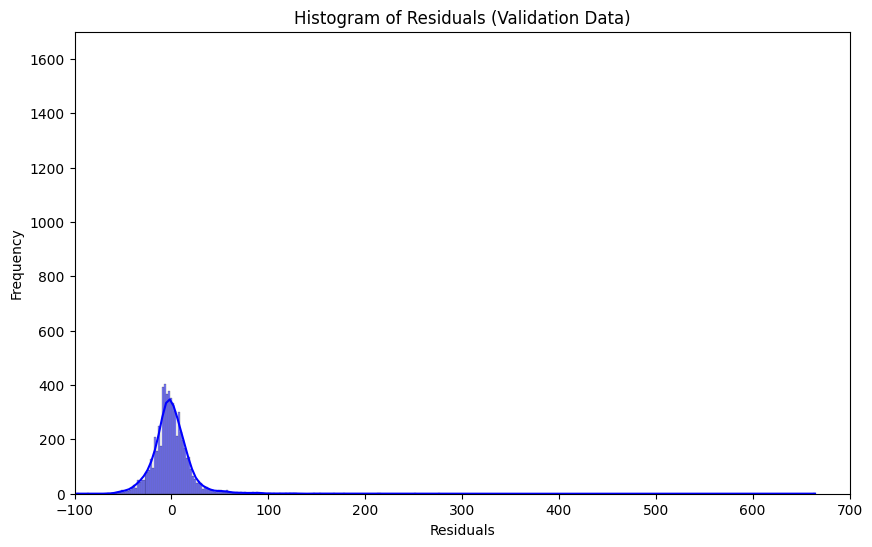

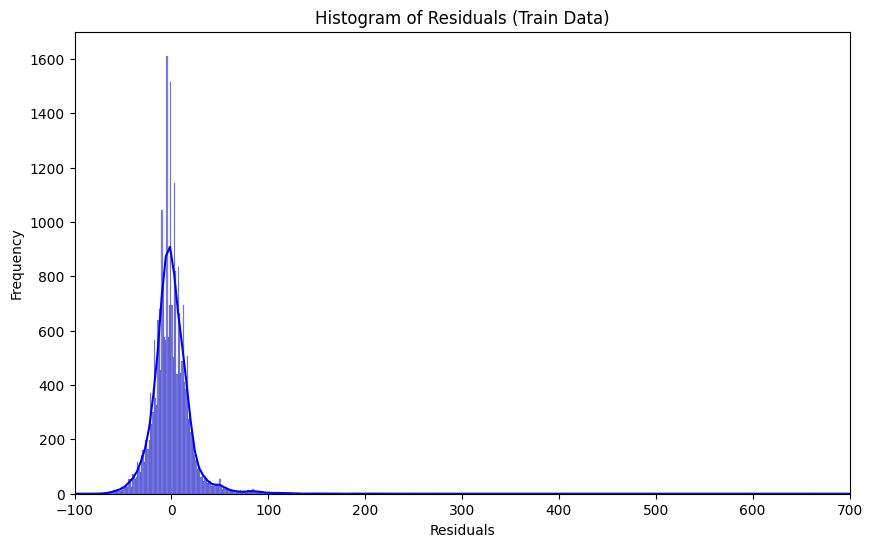

In [25]:
# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_val, kde=True, color='blue')
plt.title('Histogram of Residuals (Validation Data)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.ylim(0,1700)
plt.xlim(-100, 700)
plt.show()
## In our case, no true `y_test`, so we can’t calculate residuals directly for test set
# If we get true values for y_test, we can proceed like for validation data

plt.figure(figsize=(10, 6))
sns.histplot(residuals_train, kde=True, color='blue')
plt.title('Histogram of Residuals (Train Data)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.ylim(0,1700)
plt.xlim(-100, 700)
plt.show()


Normal distirbution of the residuals for the histogram and the Q-Q plot

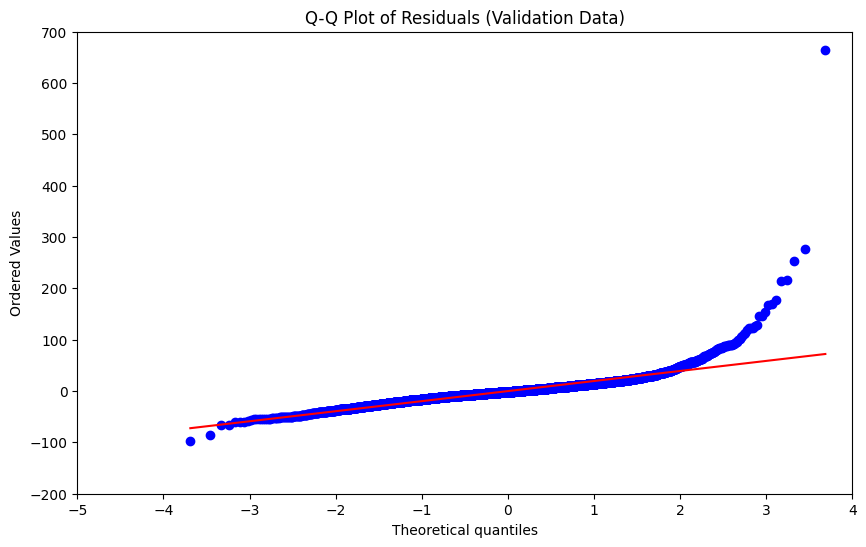

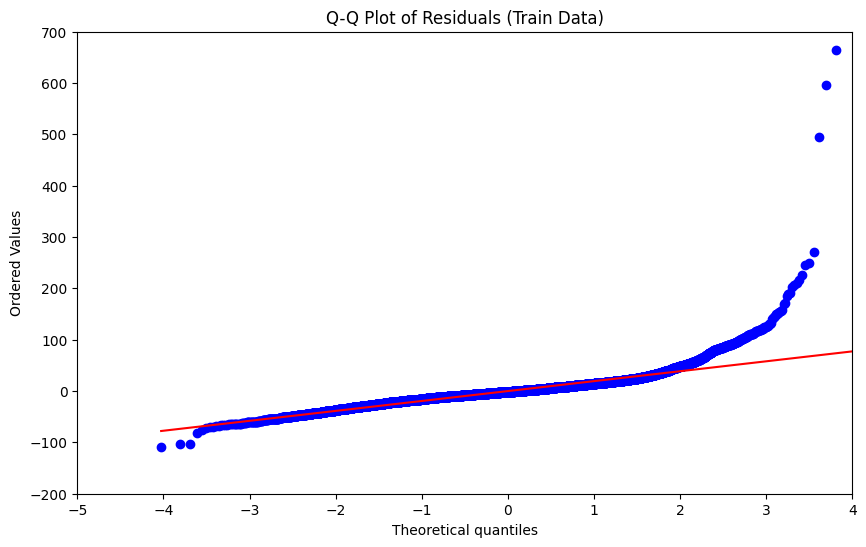

In [30]:
import scipy.stats as stats

# Q-Q plot for validation residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals_val, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Validation Data)')
plt.ylim(-200,700)
plt.xlim(-5, 4)
plt.show()

# Q-Q plot for validation residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Train Data)')
plt.ylim(-200,700)
plt.xlim(-5, 4)
plt.show()

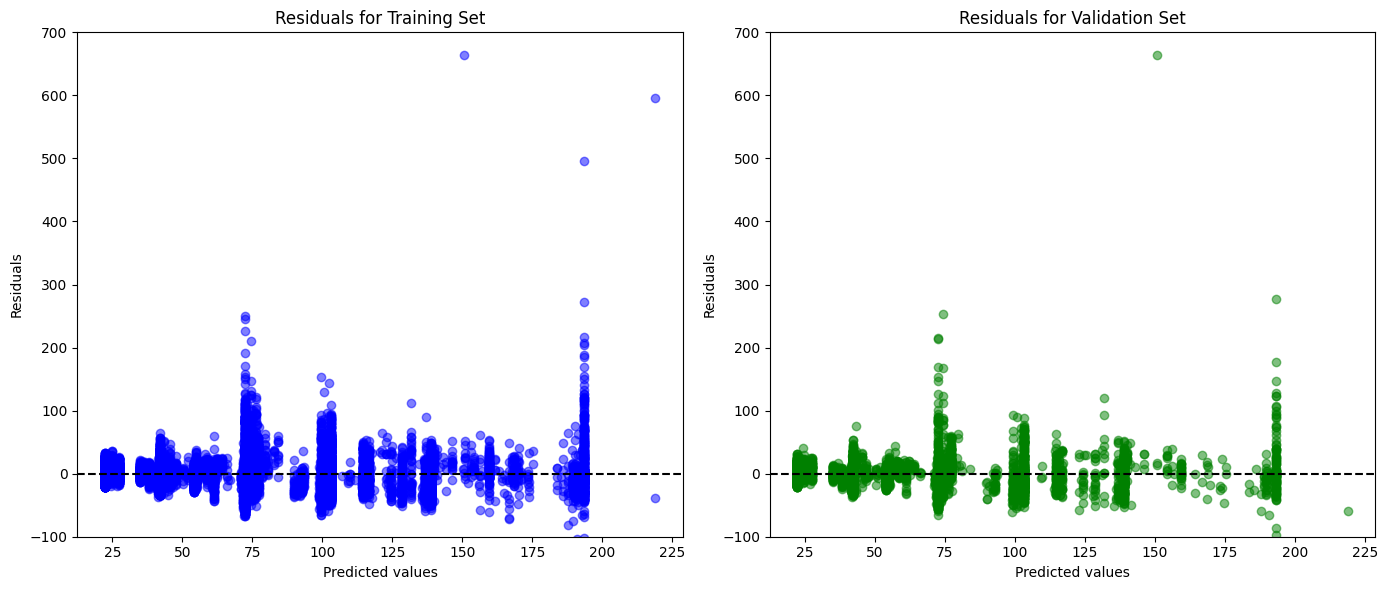

In [31]:
import matplotlib.pyplot as plt

# Plot residuals for train and validation data
plt.figure(figsize=(14, 6))

# Plot training residuals
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, residuals_train, color='blue', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals for Training Set')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.ylim(-100,700)

# Plot validation residuals
plt.subplot(1, 2, 2)
plt.scatter(y_val_pred, residuals_val, color='green', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals for Validation Set')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.ylim(-100,700)
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate performance on the training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate performance on the validation data
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"Training Mean Squared Error (MSE): {mse_train}")
print(f"Training R-squared (R²): {r2_train}")
print(f"Validation Mean Squared Error (MSE): {mse_val}")
print(f"Validation R-squared (R²): {r2_val}")

Training Mean Squared Error (MSE): 470.0675366813696
Training R-squared (R²): 0.7858319474590169
Validation Mean Squared Error (MSE): 501.00084261626137
Validation R-squared (R²): 0.7722830313520903


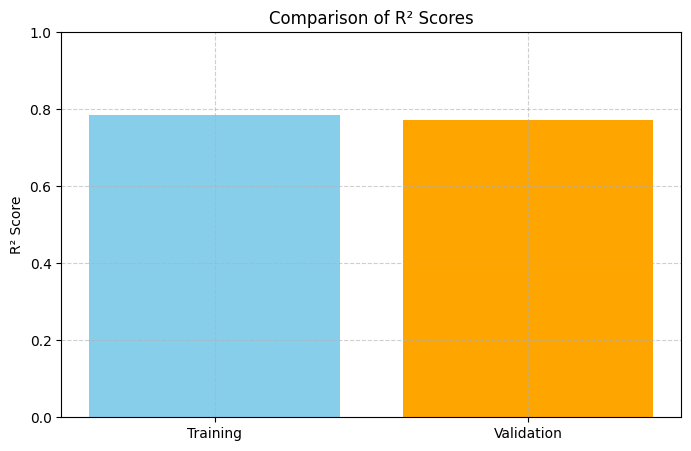

In [34]:
import matplotlib.pyplot as plt

# R² scores
r2_training = 0.7858319474590169
r2_validation = 0.7722830313520903

# Plotting R²
plt.figure(figsize=(8, 5))
plt.bar(['Training', 'Validation'], [r2_training, r2_validation], color=['skyblue', 'orange'])
plt.ylabel('R² Score')
plt.title('Comparison of R² Scores')
plt.ylim(0, 1)  # Ensures scale is consistent for R²

# Show plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


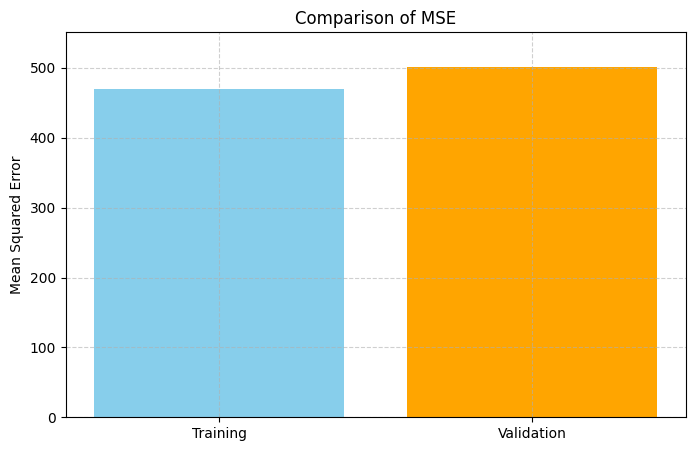

In [35]:
# MSE scores
mse_training = 470.0675366813696
mse_validation = 501.00084261626137

# Plotting MSE
plt.figure(figsize=(8, 5))
plt.bar(['Training', 'Validation'], [mse_training, mse_validation], color=['skyblue', 'orange'])
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE')
plt.ylim(0, max(mse_training, mse_validation) + 50)  # Adjust for better visual spacing

# Show plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Overfitting: The large difference between training and validation MSE and R² suggests that your model may be overfitting the training data.

    Training R²: 0.94 is quite high, indicating that the model fits the training data very well.
    Validation R²: 0.58 is much lower, indicating that the model is not generalizing well to new, unseen data. This drop in performance is typically a sign of overfitting.

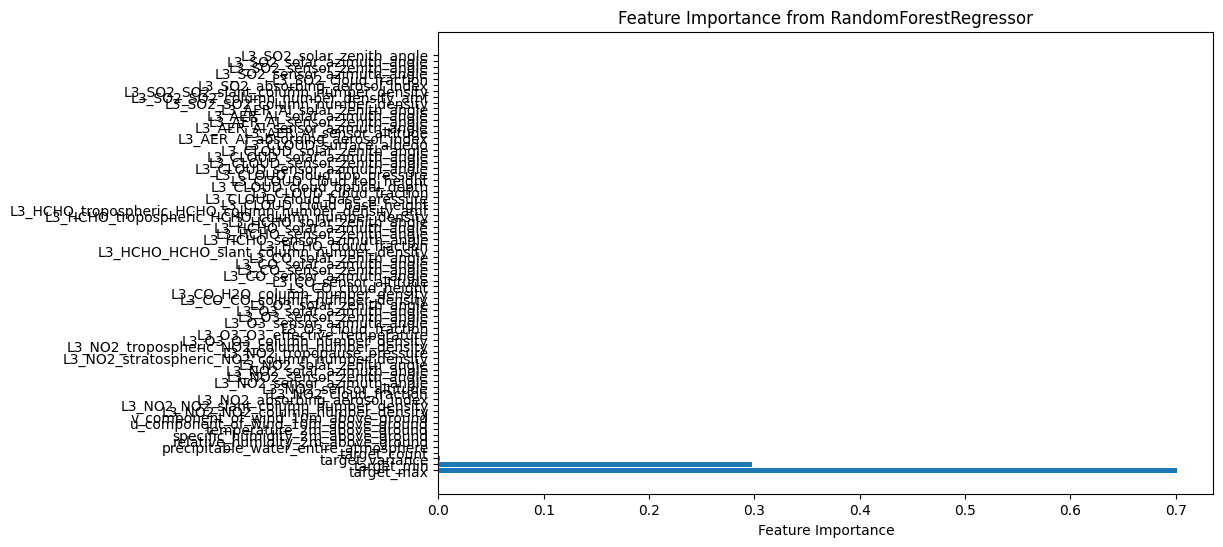

                                 Feature  Importance
1                             target_max       0.701
0                             target_min       0.297
2                        target_variance       0.002
3                           target_count       0.000
4   precipitable_water_entire_atmosphere       0.000
..                                   ...         ...
66                 L3_SO2_cloud_fraction       0.000
67           L3_SO2_sensor_azimuth_angle       0.000
68            L3_SO2_sensor_zenith_angle       0.000
69            L3_SO2_solar_azimuth_angle       0.000
70             L3_SO2_solar_zenith_angle       0.000

[71 rows x 2 columns]


In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the trained model
importances = model.feature_importances_

# Create a DataFrame to view feature importances alongside feature names
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from RandomForestRegressor')
plt.show()

# Display the sorted feature importance table
print(feature_importance_df)

Can you directly apply the model to the test data?
No, not directly, because the test data does not contain the target or the target-related features. Without these features, your model will not work as intended.
What are the implications?

    Your model has learned to make predictions based on the target and related features (like target_max, target_min).
    Since these features are absent in the test set, your model will not have the necessary information to generate predictions for the target variable on the test set.

To resume, I did this first baseline model that is overfitting (train vs. validation). 
Targets/ target min/ target max/ target count/ targe variance: these 4 features are present in the train data but are these columns do not exist in test data. I have around 30000 entries and 68 columns after dropping these 4 features from my train data while I have  16000 entries 70 olumns for the test. the  features dont exist here. Considering that I want to predict the PM2 particle concentrate usig The Sentinel-5 Precursor mission instrument which collects data useful for assessing air quality.How  can I imputate these 4 features to my test dataset ? what would be the most relevant approach ?